In [12]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install plotly
# %pip install shapely

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
# Reading the datasets
df_train = pd.read_csv("data/stores_train.csv")
df_test = pd.read_csv("data/stores_test.csv")
df_bus_stops = pd.read_csv("data/busstops_norway.csv")
df_grunkrets_age_dist = pd.read_csv("data/grunnkrets_age_distribution.csv")
df_grunkrets_house_pers = pd.read_csv("data/grunnkrets_households_num_persons.csv")
df_grunkrets_income_house = pd.read_csv("data/grunnkrets_income_households.csv")
df_grunkrets_stripped = pd.read_csv("data/grunnkrets_norway_stripped.csv")
df_plaace_hierarchy = pd.read_csv("data/plaace_hierarchy.csv")
df_extra = pd.read_csv("data/stores_extra.csv")
# df_sample_sub = pd.read_csv("data/sample_submission.csv")

# EDA

Merge the train/test in one df with a split feature.

In [3]:
df_all = pd.concat([df_train, df_test])
df_all['split'] = np.where(df_all['revenue'].isna(), 'Test', 'Train')
df_all

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,split
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,Train
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,Train
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,Train
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,Train
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,917323003-917383529-844309,2016,GULATING HAUGESUND,2.8.11.2,Beer and soda shop,11490601,BRÅTAVEGEN 30,59.259575,5.325813,GULATING GRUPPEN,NaN,NaN,Test
8573,917353379-917411824-845904,2016,STAVANGER BEER AS,2.8.11.2,Beer and soda shop,11030901,SANDVIGÅ 7,58.976219,5.721546,NaN,NaN,NaN,Test
8574,917072302-917089248-833647,2016,GULATING ØLUTSALG OG PUB,2.8.11.2,Beer and soda shop,2270103,GARDERBAKKEN 6,59.928330,11.163202,GULATING GRUPPEN,NaN,NaN,Test
8575,916960557-916993161-829908,2016,VI BRYGGER BUTIKKDRIFT AS,2.8.11.2,Beer and soda shop,12470701,RAVNANGERVEGEN,60.445790,5.161587,NaN,NaN,NaN,Test


In [4]:
print(f"Number of Training Examples = {df_train.shape[0]}")
print(f"Number of Test Examples = {df_test.shape[0]}\n")
print(f"Training Shape = {df_train.shape}")
print(f"Test Shape = {df_test.shape}\n")
print('Train columns \n', list(df_train.columns))
print('Test columns \n', list(df_test.columns))

Number of Training Examples = 12859
Number of Test Examples = 8577

Training Shape = (12859, 12)
Test Shape = (8577, 11)

Train columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name', 'revenue']
Test columns 
 ['store_id', 'year', 'store_name', 'plaace_hierarchy_id', 'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon', 'chain_name', 'mall_name']


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12859 entries, 0 to 12858
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             12859 non-null  object 
 1   year                 12859 non-null  int64  
 2   store_name           12859 non-null  object 
 3   plaace_hierarchy_id  12859 non-null  object 
 4   sales_channel_name   12859 non-null  object 
 5   grunnkrets_id        12859 non-null  int64  
 6   address              11085 non-null  object 
 7   lat                  12859 non-null  float64
 8   lon                  12859 non-null  float64
 9   chain_name           3737 non-null   object 
 10  mall_name            2280 non-null   object 
 11  revenue              12859 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column      

Text(0.5, 1.0, 'Fraction of rows with NaN values')

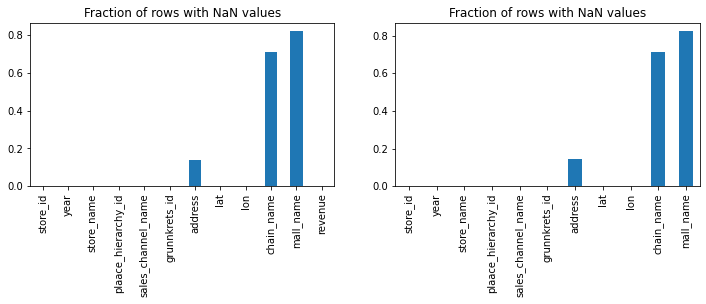

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 3), ncols=2)
df_train.isna().mean().plot.bar(ax=ax1)
df_test.isna().mean().plot.bar(ax=ax2)
ax1.set_title('Fraction of rows with NaN values')
ax2.set_title('Fraction of rows with NaN values')

The adress feature as 1,774:train &  1237:test NaN rows.

The other NaN features are for the chain/mall name but it's normal. This one should be encoded in the future.

## Revenue

Minimal revenue is : 0.0
Maximal revenue is : 219.599
Average revenue is : 8.22


C:\Users\janni\anaconda3\envs\scipy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


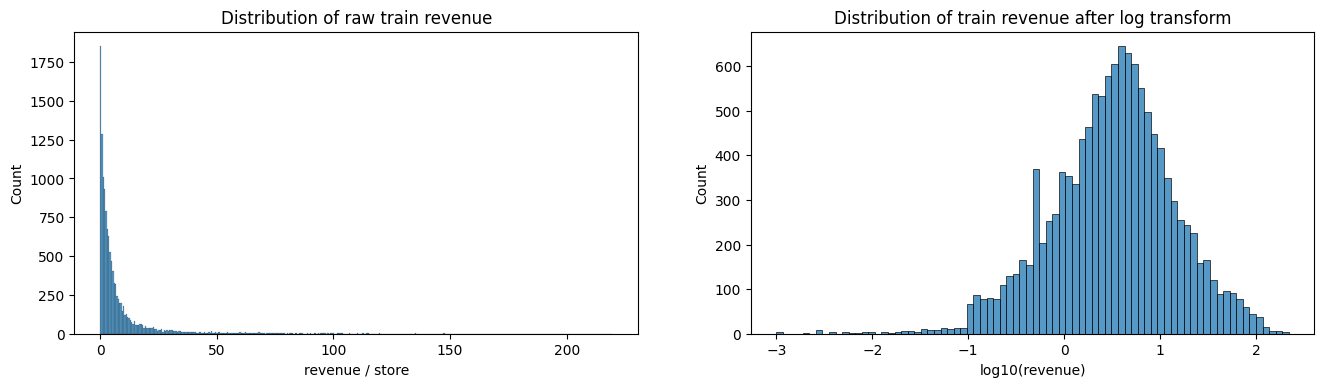

In [7]:
print(f"Minimal revenue is : {df_train['revenue'].min()}")
print(f"Maximal revenue is : {df_train['revenue'].max()}")
print(f"Average revenue is : {round(df_train['revenue'].mean(), 2)}")

fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
sns.histplot(df_train.revenue.rename('revenue / store'), ax=ax1)
ax1.set_title('Distribution of raw train revenue');
sns.histplot(np.log10(df_train.revenue).rename('log10(revenue)'), ax=ax2)
ax2.set_title('Distribution of train revenue after log transform');

In [8]:
print(f"Number of revenue 0 :{df_train[df_train.revenue == 0].revenue.count()}")

Number of revenue 0 :217


In [9]:
print(f"Number of shop with a revenue at 0 : {len(df_train[df_train.revenue == 0])}")

Number of shop with a revenue at 0 : 217


## Chain Name && Mall Name

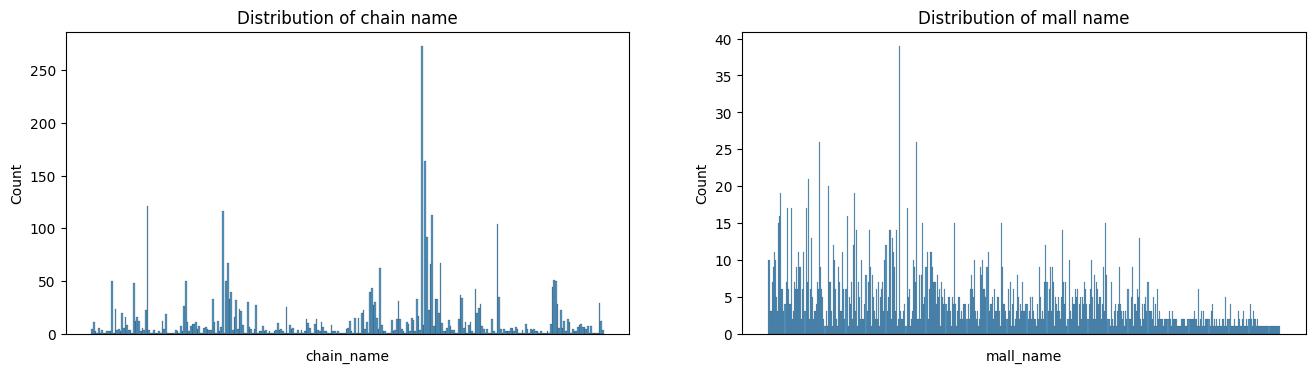

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), ncols=2, dpi=100)
sns.histplot(df_train.chain_name, ax=ax1)
ax1.set_title('Distribution of chain name');
ax1.set(xticklabels=[]);
ax1.tick_params(bottom=False)

sns.histplot(df_train.mall_name, ax=ax2)
ax2.set_title('Distribution of mall name');
ax2.set(xticklabels=[]);
ax2.tick_params(bottom=False)

In [11]:
df_mall_chain = df_train
df_mall_chain['encoded_mall'] = np.where(df_train['mall_name'].isna(), 0, 1)
df_mall_chain['encoded_chain'] = np.where(df_train['chain_name'].isna(), 0, 1)
df_mall_chain.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue,encoded_mall,encoded_chain
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998,1,1
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828,0,1
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099,1,1
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296,1,1
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528,1,1


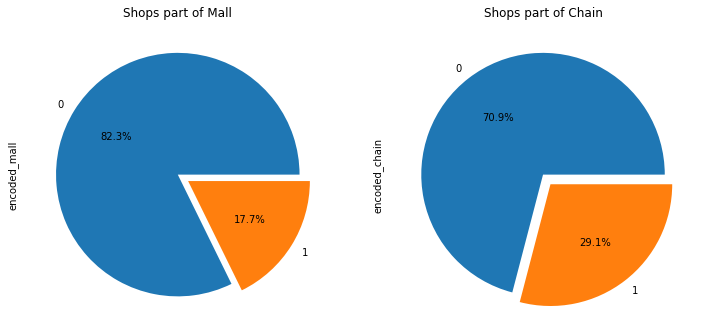

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
df_mall_chain['encoded_mall'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
df_mall_chain['encoded_chain'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=False)
ax[0].set_title('Shops part of Mall')
ax[1].set_title('Shops part of Chain')
plt.show()

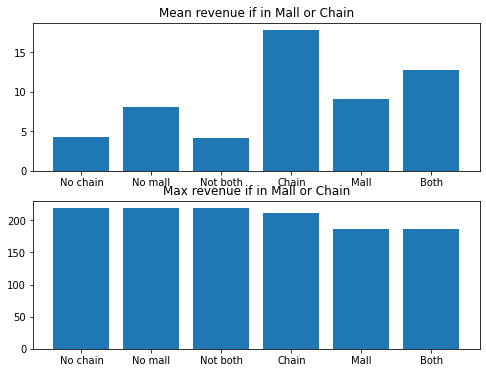

In [13]:
f,(ax1, ax2) = plt.subplots(2, figsize=(8,6))
x = [df_mall_chain[df_mall_chain.encoded_chain == 0].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_mall == 0].revenue.mean(),
     df_mall_chain[(df_mall_chain.encoded_mall == 0) & (df_mall_chain.encoded_chain == 0)].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_chain == 1].revenue.mean(),
     df_mall_chain[df_mall_chain.encoded_mall == 1].revenue.mean(),
     df_mall_chain[(df_mall_chain.encoded_mall == 1) & (df_mall_chain.encoded_chain == 1)].revenue.mean(),
    ]       
ax1.bar(np.arange(len(x)), height=x)
ax1.set_xticks(np.arange(len(x)), ['No chain', 'No mall', 'Not both', 'Chain', 'Mall', 'Both']);
ax1.set_title('Mean revenue if in Mall or Chain');

x = [df_mall_chain[df_mall_chain.encoded_chain == 0].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_mall == 0].revenue.max(),
     df_mall_chain[(df_mall_chain.encoded_mall == 0) & (df_mall_chain.encoded_chain == 0)].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_chain == 1].revenue.max(),
     df_mall_chain[df_mall_chain.encoded_mall == 1].revenue.max(),
     df_mall_chain[(df_mall_chain.encoded_mall == 1) & (df_mall_chain.encoded_chain == 1)].revenue.max(),
    ]       
ax2.bar(np.arange(len(x)), height=x)
ax2.set_xticks(np.arange(len(x)), ['No chain', 'No mall', 'Not both', 'Chain', 'Mall', 'Both']);
ax2.set_title('Max revenue if in Mall or Chain');


## Localisation

In [14]:
print(f"Minimal lat/lon is : {df_all['lat'].min()} | {df_all['lon'].min()}")
print(f"Maximal lat/lon is : {df_all['lat'].max()} | {df_all['lon'].max()}")
print(f"Average lat/lon is : {round(df_all['lat'].mean(), 2)} | {round(df_all['lon'].mean(), 2)}")

Minimal lat/lon is : 57.99418282682979 | 4.62588949001731
Maximal lat/lon is : 71.1099216326422 | 31.11893463
Average lat/lon is : 61.23 | 10.01


C:\Users\janni\anaconda3\envs\scipy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


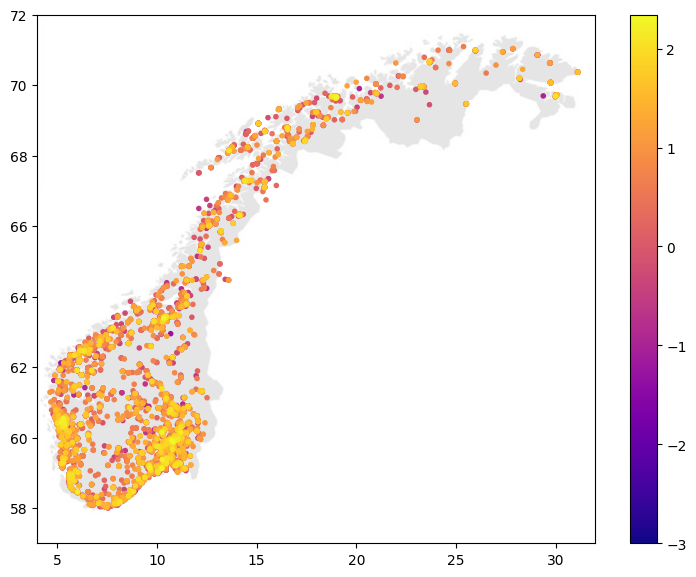

In [16]:
df_map = df_train.sort_values(by='revenue', ascending=True)
backdrop = plt.imread('ressources/map.jpg')
plt.figure(figsize=(9, 7), dpi=100)
ax = plt.gca()
ax.imshow(backdrop, 
          extent=[4,32, 57, 72], 
          aspect='auto', 
          alpha=0.2,
          )
cmap = np.log10(df_map.revenue)
heatmap = ax.scatter(x=df_map['lon'], 
                     y=df_map['lat'], 
                     c=cmap,
                     cmap='plasma',
                     marker=".",
                     )
ax.set_xlim(4, 32)    # min/max longitude of image 
ax.set_ylim(57, 72)  # min/max latitude of image
cbar = plt.colorbar(heatmap)

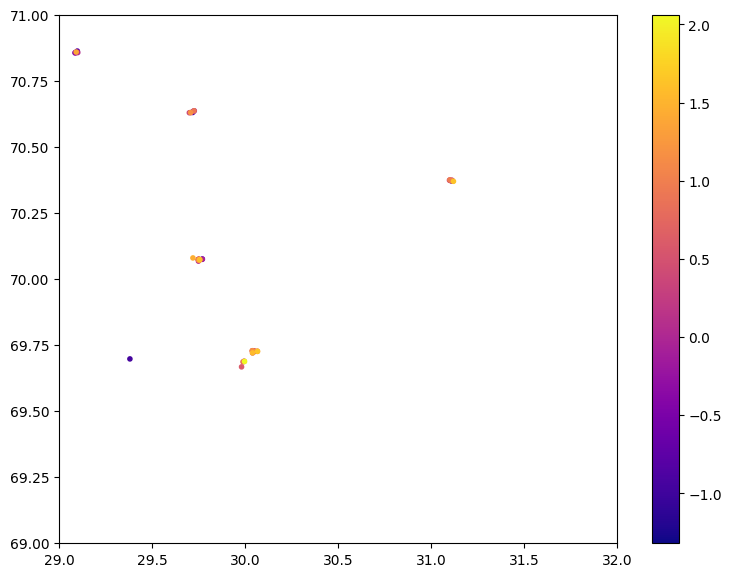

In [17]:
def plot_restricted_area(min_lon, max_lon, min_lat, max_lat):
    area = df_train[(df_train.lon>min_lon) & (df_train.lon<max_lon) & (df_train.lat>min_lat) & (df_train.lat<max_lat)]
    area = area.sort_values(by='revenue', ascending=True)
    backdrop = plt.imread('ressources/map.jpg')
    plt.figure(figsize=(9, 7), dpi=100)
    ax = plt.gca()
    heatmap = ax.scatter(x=area['lon'], 
               y=area['lat'], 
               c=np.log10(area.revenue),
               cmap='plasma',
               marker=".",
               )
    ax.set_xlim(min_lon, max_lon)    # min/max longitude of image 
    ax.set_ylim(min_lat, max_lat)  # min/max latitude of image
    
    cbar = plt.colorbar(heatmap)

# plot_restricted_area(10.3, 11.25, 59.7, 60)
plot_restricted_area(29, 32, 69, 71)

Here we can notice that the shop with the most shops around it in a certain area seems to be the richer.

## External Data

### Bus Stop

In [10]:
df_bus_stops.head()

,busstop_id,stopplace_type,importance_level,side_placement,geometry
0,853cb081-cc32-4880-aa3e-26e96870d874,Plattform og lomme,Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(6.54064723379766 61.0618887850553)
1,156b052b-2771-497a-b4f4-97fed59e1aca,"Lomme og skilt, ikke plattform",Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(5.89980086113255 60.1421872817075)
2,7312a280-e14f-4b09-a421-02e8fe1bc63e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781327278563 59.9299988828761)
3,d9cda2c7-355a-49c1-b56c-a33180d2a82e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781496457324 59.9301044643692)
4,f803bcd3-182d-450b-bbb4-113c6ca885c2,NaN,Mangler viktighetsnivå,MIDDLE_RIGHT,POINT(10.7781676444854 59.9302099995898)


In [12]:
geometries = np.asarray(df_grunkrets_stripped.geometry)
print("Different kind of shapes are :", set([geometry[:geometry.find('(')] for geometry in geometries]))

Different kind of shapes are : {'POLYGON', 'MULTIPOLYGON'}


In [27]:
from shapely.geometry import Point, LineString, Polygon
from shapely.wkt import loads

import time

# First version (quickest afterall)
def parsing_bus_grunkret(bus_coord, grunkrets):
    
    start = time.time()

    grunkrets_id= []
    
    geometries =[loads(geometry) for geometry in np.asarray(grunkrets['geometry'])]
    grunkrets = {idx: geometrie for idx, geometrie in zip(np.asarray(grunkrets['grunnkrets_id']), geometries)}
    
    for i in range(len(bus_coord)):
        loc = loads(bus_coord.iloc[i])
# Reove bus stop without grunkret
        test = []
        for idx, grunkret_id in enumerate(grunkrets):
            if grunkrets[grunkret_id].contains(loc):
                grunkrets_id.append(grunkret_id)
                break
            elif idx == len(grunkrets)-1:
                # Bus Stop isn't in any grunkret
                grunkrets_id.append(np.nan)  
        if i % 500 == 0:
            print(f"To do 500 bus stop : {round(time.time()-start, 2)}s")
        
    return grunkrets_id



df_grunkrets_stripped = df_grunkrets_stripped[df_grunkrets_stripped.year == 2016]

df_bus_stops = df_bus_stops.head(10000)

df_bus_stops['grunnkrets_id'] = parsing_bus_grunkret(df_bus_stops['geometry'], df_grunkrets_stripped[['grunnkrets_id', 'geometry']])

df_bus_stops.to_csv('data/busstops_norway_fixed.csv', index=False, header=True)
df_bus_stops.head()

To do 500 bus stop : 10.06s


,busstop_id,stopplace_type,importance_level,side_placement,geometry,grunkrets_id
0,853cb081-cc32-4880-aa3e-26e96870d874,Plattform og lomme,Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(6.54064723379766 61.0618887850553),14170108.0
1,156b052b-2771-497a-b4f4-97fed59e1aca,"Lomme og skilt, ikke plattform",Mangler viktighetsnivå,LEFT_AND_RIGHT,POINT(5.89980086113255 60.1421872817075),NaN
2,7312a280-e14f-4b09-a421-02e8fe1bc63e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781327278563 59.9299988828761),3012106.0
3,d9cda2c7-355a-49c1-b56c-a33180d2a82e,NaN,Mangler viktighetsnivå,MIDDLE_LEFT,POINT(10.7781496457324 59.9301044643692),3012106.0
4,f803bcd3-182d-450b-bbb4-113c6ca885c2,NaN,Mangler viktighetsnivå,MIDDLE_RIGHT,POINT(10.7781676444854 59.9302099995898),3012106.0


In [58]:
df_grunkrets_bus_count = df_grunkrets_stripped['grunnkrets_id']
df = df_bus_stops['grunnkrets_id'].value_counts()
# df_bus_stops.head()
df = pd.DataFrame(df, columns=["count"])
df
# df = pd.merge(df_grunkrets_bus_count, df2, on="grunnkrets_id")

,count


,grunnkrets_id,number_bus_stop
260.0,10010507.0,NaN
261.0,10011105.0,NaN
262.0,10011604.0,NaN
263.0,10011703.0,NaN
264.0,10011707.0,NaN


### Grunkrets

Drawing the grunkrets map

0.0 %
1.8842327404280976 %
3.7684654808561953 %
5.652698221284293 %
7.5369309617123905 %
9.421163702140488 %
11.305396442568586 %
13.189629182996685 %
15.073861923424781 %
16.95809466385288 %
18.842327404280976 %
20.726560144709076 %
22.610792885137172 %
24.49502562556527 %
26.37925836599337 %
28.263491106421466 %
30.147723846849562 %
32.03195658727766 %
33.91618932770576 %
35.800422068133855 %
37.68465480856195 %
39.56888754899005 %
41.45312028941815 %
43.33735302984625 %
45.221585770274345 %
47.10581851070244 %
48.99005125113054 %
50.874283991558634 %
52.75851673198674 %
54.642749472414835 %
56.52698221284293 %
58.41121495327103 %
60.295447693699124 %
62.17968043412722 %
64.06391317455532 %
65.94814591498341 %
67.83237865541152 %
69.71661139583962 %
71.60084413626771 %
73.48507687669581 %
75.3693096171239 %
77.253542357552 %
79.1377750979801 %
81.0220078384082 %
82.9062405788363 %
84.7904733192644 %
86.6747060596925 %
88.55893880012059 %
90.44317154054869 %
92.32740428097678 %
94.211

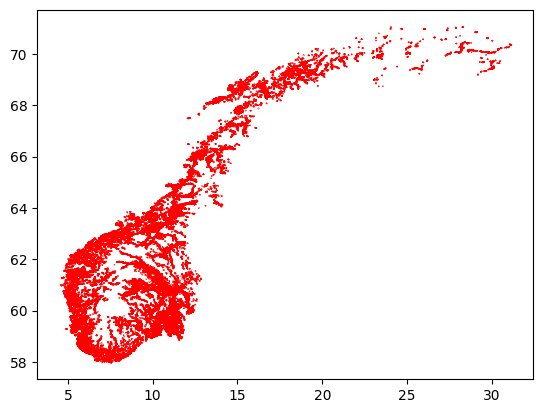

In [41]:
from shapely.wkt import loads
from shapely.geometry import Polygon, MultiPolygon

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

geometries = [loads(geometry) for geometry in np.asarray(df_grunkrets_stripped['geometry'])]

fig, ax = plt.subplots()
for idx, geometry in enumerate(geometries):
    if type(geometry) is MultiPolygon:
        for element in geometry.geoms:
            plot_polygon(ax, element, edgecolor='red')
    else:
        plot_polygon(ax, geometry, edgecolor='red')
    if idx % 500 == 0:
        print(idx*100/len(geometries), "%")
plt.show()

In [23]:
df_grunkrets_age_dist.head()

,grunnkrets_id,year,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,...,age_81,age_82,age_83,age_84,age_85,age_86,age_87,age_88,age_89,age_90
0,16013117,2015,14,14,14,14,13,13,12,11,...,0,0,0,0,0,0,0,0,0,0
1,16013117,2016,10,10,10,10,10,10,9,9,...,0,0,0,0,0,0,0,0,0,0
2,11030206,2015,5,5,5,5,5,4,4,3,...,0,0,0,0,0,0,0,0,0,0
3,16011203,2016,2,2,2,2,2,3,3,3,...,1,1,1,1,1,1,1,0,0,0
4,3011601,2016,7,7,7,7,6,6,5,4,...,1,1,0,0,0,0,0,0,0,0


In [24]:
df_grunkrets_house_pers.head()

,grunnkrets_id,year,couple_children_0_to_5_years,couple_children_18_or_above,couple_children_6_to_17_years,couple_without_children,single_parent_children_0_to_5_years,single_parent_children_18_or_above,single_parent_children_6_to_17_years,singles
0,12010509,2015,0,0,4,0,0,0,0,4
1,14390206,2015,0,7,0,0,0,0,0,3
2,18040514,2015,10,0,0,0,0,0,0,7
3,18040804,2015,0,0,0,0,0,0,0,0
4,18200101,2015,0,6,0,0,0,0,0,4


In [25]:
df_grunkrets_income_house.head()

,grunnkrets_id,year,all_households,singles,couple_without_children,couple_with_children,other_households,single_parent_with_children
0,14200105,2016,551700,270300,0,0,0,0
1,2311202,2015,577700,311800,0,682300,0,0
2,2310501,2015,668800,292500,0,842000,0,0
3,14200401,2016,507000,250700,0,0,0,0
4,14200105,2015,539900,275800,0,710300,0,0


In [73]:
df_grunkrets_stripped.head()

,grunnkrets_id,year,grunnkrets_name,district_name,municipality_name,geometry,area_km2
0,10010701,2015,Grim-Dueknipen,Grim-Møllevann-Dalane,Kristiansand,MULTIPOLYGON(((7.97199691121304 58.14336769560...,0.768961
1,10010803,2015,Kvadraturen sørøst,Kvadraturen-Eg,Kristiansand,"POLYGON((8.00234207061135 58.1443514886041, 8....",0.361355
2,10020608,2015,Ormestad,Holum,Mandal,"POLYGON((7.48512808482995 58.0374976883392, 7....",0.280188
3,10020901,2015,Tregde,Tregde-Skjernøy,Mandal,MULTIPOLYGON(((7.50996051810658 58.02134863868...,0.156311
4,10030210,2015,Bryneheia,Vanse/Åpta,Farsund,"POLYGON((6.70396719073296 58.0877854965615, 6....",0.791894


In [84]:
print("Apparently there is multiple grunkrets with the same idea: ", len(pd.unique(df_grunkrets_stripped['grunnkrets_id'])))
print("Because there is multiple years I guess : ", pd.unique(df_grunkrets_stripped['year']))

Apparently there is multiple grunkrets with the same idea:  13270
Because there is multiple years I guess :  [2015 2016]


In [27]:
df_plaace_hierarchy.head()

,plaace_hierarchy_id,sales_channel_name,lv1,lv1_desc,lv2,lv2_desc,lv3,lv3_desc,lv4,lv4_desc
0,1.1.1.0,Hamburger restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.1,Hamburger restaurants,1.1.1.0,Hamburger restaurants
1,1.1.2.0,Sushi and wok restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.2,Sushi and wok restaurants,1.1.2.0,Sushi and wok restaurants
2,1.1.3.0,Thai restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.3,Thai restaurants,1.1.3.0,Thai restaurants
3,1.1.4.0,Chinese restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.4,Chinese restaurants,1.1.4.0,Chinese restaurants
4,1.1.5.0,Pizza restaurants,1,Dining and Experiences,1.1,Restaurant,1.1.5,Pizza restaurants,1.1.5.0,Pizza restaurants


In [28]:
df_extra.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name
0,911669196-973140302-27020,2016,BURGER KING STRANDGATEN,1.1.1.0,Hamburger restaurants,12010115,STRANDGATEN 5,60.393979,5.323851,BURGER KING,NaN
1,913155726-992998792-5832,2016,BURGER KING JESSHEIM STORSENTER,1.1.1.0,Hamburger restaurants,2350205,STORGATA 6,60.142760,11.171834,BURGER KING,Jessheim Storsenter
2,988252905-981108604-47887,2016,BURGER KING LANGNES,1.1.1.0,Hamburger restaurants,19020419,HULDERVEGEN 6,69.671483,18.920483,BURGER KING,NaN
3,995194546-891354622-45262,2016,BURGER KING MAGNETEN LEVANGER,1.1.1.0,Hamburger restaurants,17190701,NaN,63.732791,11.281785,BURGER KING,Magneten
4,881339692-979954964-3203,2016,BURGER KING ULLEVAAL STADION,1.1.1.0,Hamburger restaurants,3014511,SOGNSVEIEN 75,59.948558,10.732823,BURGER KING,Amfi Ullevaal


In [96]:
ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(df_mall_chain[["sales_channel_name"]])
ohe.categories_

#df_mall_chain.head()
df_test.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,...,"(-1, 8567)","(-1, 8568)","(-1, 8569)","(-1, 8570)","(-1, 8571)","(-1, 8572)","(-1, 8573)","(-1, 8574)","(-1, 8575)","(-1, 8576)"
0,914206820-914239427-717245,2016,VÅLERENGA HALAL BURGER AS,1.1.1.0,Hamburger restaurants,3012704,STRØMSVEIEN 25 A,59.908672,10.787031,NaN,...,1,0,1,1,0,0,0,1,1,1
1,916789157-916823770-824309,2016,BURGER KING MYREN,1.1.1.0,Hamburger restaurants,8061401,MYREN 1,59.201467,9.588243,BURGER KING,...,1,0,1,1,0,0,0,1,1,1
2,913341082-977479363-2948,2016,BURGER KING STOVNER,1.1.1.0,Hamburger restaurants,3013917,STOVNER SENTER 3,59.962146,10.924524,BURGER KING,...,1,0,1,1,0,0,0,1,1,1
3,889682582-889697172-28720,2016,BURGER KING TUNGASLETTA,1.1.1.0,Hamburger restaurants,16012104,TUNGASLETTA 16,63.420785,10.461091,BURGER KING,...,1,0,1,1,0,0,0,1,1,1
4,997991699-998006945-417222,2016,VULKAN BURGERBAR,1.1.1.0,Hamburger restaurants,3014305,AUD SCHØNEMANNS VEI 15,59.921102,10.785123,VULKAN BURGERBAR,...,1,0,1,1,0,0,0,1,1,1


## Ready to use data

In [3]:
#train
data_train = df_train
data_train['encoded_mall'] = np.where(df_train['mall_name'].isna(), 0, 1)
data_train['encoded_chain'] = np.where(df_train['chain_name'].isna(), 0, 1)

#test
data_test = df_test
data_test['encoded_mall'] = np.where(df_test['mall_name'].isna(), 0, 1)
data_test['encoded_chain'] = np.where(df_test['chain_name'].isna(), 0, 1)

## First Model: Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

X_train = data_train[["grunnkrets_id", "encoded_mall", "encoded_chain"]]
Y_train = data_train["revenue"]
data_test = data_test[["grunnkrets_id", "encoded_mall", "encoded_chain"]]
modelLR = LinearRegression()
modelLR.fit(X_train, Y_train)
Y_Pred = modelLR.predict(data_test)

from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
#print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_testL,Y_pred))
#print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_testL,Y_pred))
#print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_testL,Y_pred)))
#print('r2 value                :' ,metrics.r2_score(y_testL,Y_pred))

#feature ideas: near big city -> 1/0

y-intercept             : 5.039578472410485
beta coefficients       : [-4.95593995e-08 -2.39265509e+00  1.39985238e+01]


In [30]:

# Generate submission dataframe 
# NOTE: It is important that the ID and predicted values match
submission = pd.DataFrame()
submission['id'] = df_test.store_id 
submission['predicted'] = np.asarray(Y_Pred)

# Save it to disk (`index=False` means don't save the index in the csv)
submission.to_csv('sample_submission.csv', index=False)
submission

,id,predicted
0,914206820-914239427-717245,4.890271
1,916789157-916823770-824309,18.638584
2,913341082-977479363-2948,16.496079
3,889682582-889697172-28720,18.244552
4,997991699-998006945-417222,18.888715
...,...,...
8572,917323003-917383529-844309,18.468635
8573,917353379-917411824-845904,4.492894
8574,917072302-917089248-833647,18.925597
8575,916960557-916993161-829908,4.421538
